In [123]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [60]:
df = pd.read_csv("insurance.csv")

<IPython.core.display.Javascript object>

In [61]:
df[df["charges"].isnull() == True].count()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<IPython.core.display.Javascript object>

In [62]:
df.shape

(1338, 7)

<IPython.core.display.Javascript object>

In [63]:
df["log_bmi"] = np.log(df["bmi"])

<IPython.core.display.Javascript object>

<Axes: xlabel='log_bmi', ylabel='Count'>

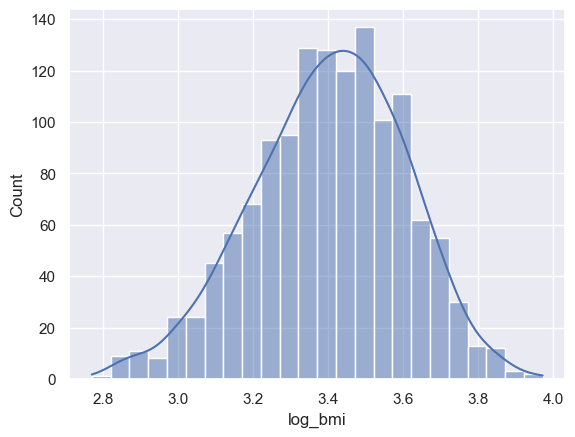

<IPython.core.display.Javascript object>

In [64]:
sns.histplot(data=df["log_bmi"], kde=True)

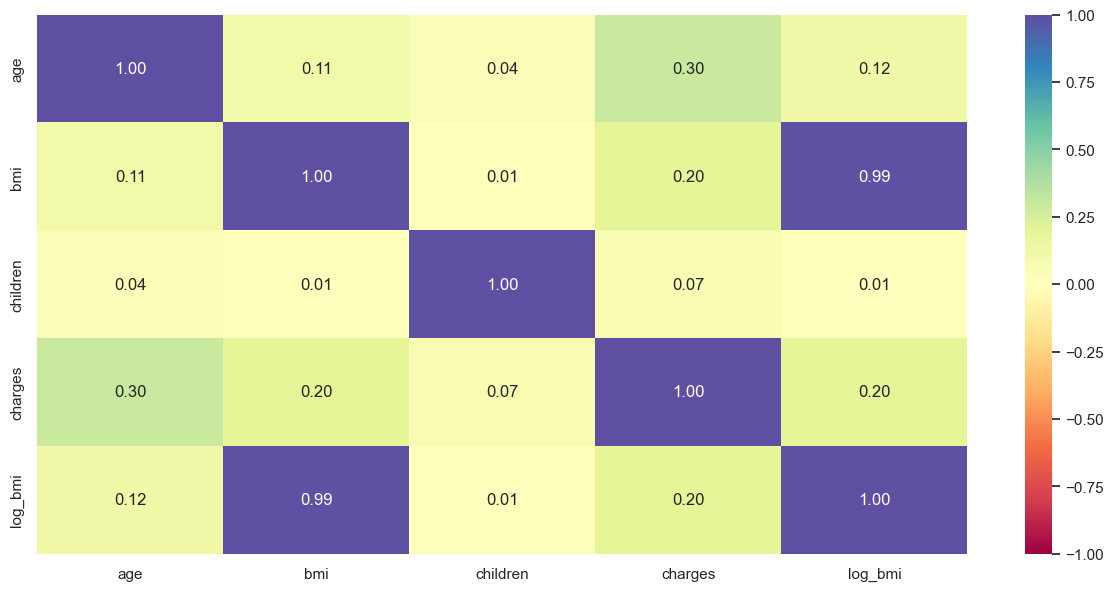

<IPython.core.display.Javascript object>

In [65]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [66]:
X = pd.get_dummies(
    df,
    columns=df.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,age,bmi,children,charges,log_bmi,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,3.328627,0,1,0,0,1
1,18,33.770,1,1725.55230,3.519573,1,0,0,1,0
2,28,33.000,3,4449.46200,3.496508,1,0,0,1,0
3,33,22.705,0,21984.47061,3.122585,1,0,1,0,0
4,32,28.880,0,3866.85520,3.363149,1,0,1,0,0


<IPython.core.display.Javascript object>

In [67]:
X = X.drop("log_bmi", axis=1)

<IPython.core.display.Javascript object>

In [68]:
y = X["charges"]
X = X.drop("charges", axis=1)

<IPython.core.display.Javascript object>

In [69]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

<IPython.core.display.Javascript object>

In [71]:
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [72]:
X.head()

,const,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,1.0,19,27.900,0,0,1,0,0,1
1,1.0,18,33.770,1,1,0,0,1,0
2,1.0,28,33.000,3,1,0,0,1,0
3,1.0,33,22.705,0,1,0,1,0,0
4,1.0,32,28.880,0,1,0,1,0,0


<IPython.core.display.Javascript object>

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [74]:
X_test.shape

(402, 9)

<IPython.core.display.Javascript object>

In [75]:
X_train.shape

(936, 9)

<IPython.core.display.Javascript object>

In [76]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     356.2
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          1.27e-276
Time:                        10:43:58   Log-Likelihood:                -9477.0
No. Observations:                 936   AIC:                         1.897e+04
Df Residuals:                     927   BIC:                         1.902e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.104e+04   1172.364  

<IPython.core.display.Javascript object>

In [79]:
model.params[0] < -1000

True

<IPython.core.display.Javascript object>

In [80]:
model.params

const              -11039.238419
age                   251.681865
bmi                   322.389107
children              344.964255
sex_male             -282.796347
smoker_yes          24059.390477
region_northwest     -304.090098
region_southeast     -939.342097
region_southwest     -868.188559
dtype: float64

<IPython.core.display.Javascript object>

In [81]:
0.72 < 0.752 < 0.78

True

<IPython.core.display.Javascript object>

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [
    (variance_inflation_factor(X.values, i), X.columns[i])
    for i in range(len(X.columns))
]

<IPython.core.display.Javascript object>

In [87]:
vif


[(35.527487693786284, 'const'),
 (1.016822149003811, 'age'),
 (1.1066297324286172, 'bmi'),
 (1.004010642137024, 'children'),
 (1.0089001621005735, 'sex_male'),
 (1.0120736649061481, 'smoker_yes'),
 (1.5188230422658706, 'region_northwest'),
 (1.6522297050744437, 'region_southeast'),
 (1.5294111558740762, 'region_southwest')]

<IPython.core.display.Javascript object>

In [97]:
pvalue = model.pvalues > 0.05
pvalue

const               False
age                 False
bmi                 False
children            False
sex_male             True
smoker_yes          False
region_northwest     True
region_southeast     True
region_southwest     True
dtype: bool

<IPython.core.display.Javascript object>

In [99]:
pvalue.keys()

Index(['const', 'age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

<IPython.core.display.Javascript object>

In [ ]:
X_train.columns[model.pvalues > 0.05].head()

In [122]:
round(model.pvalues, 2)

const               0.00
age                 0.00
bmi                 0.00
children            0.03
sex_male            0.48
smoker_yes          0.00
region_northwest    0.60
region_southeast    0.10
region_southwest    0.13
dtype: float64

<IPython.core.display.Javascript object>

In [89]:
model.pvalues > 0.05

const               False
age                 False
bmi                 False
children            False
sex_male             True
smoker_yes          False
region_northwest     True
region_southeast     True
region_southwest     True
dtype: bool

<IPython.core.display.Javascript object>

In [103]:
X_TrainGold = X_train.drop(
    ["sex_male", "region_northwest", "region_southeast", "region_southwest"], axis=1
)

<IPython.core.display.Javascript object>

In [116]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

# Calculate squared residuals

model_gold = sm.OLS(y_train, X_TrainGold).fit()

f_stat, pvalue, ordering = het_goldfeldquandt(model_gold.resid, X_TrainGold)

print(pvalue)

0.6003139612490169


<IPython.core.display.Javascript object>

In [107]:
0.2 < pvalue < 0.3

True

<IPython.core.display.Javascript object>

In [119]:
x_train1 = X_train.drop(
    ["sex_male", "region_northwest", "region_southeast", "region_southwest"], axis=1
)
x_test1 = X_test.drop(
    ["sex_male", "region_northwest", "region_southeast", "region_southwest"], axis=1
)

linear_regression1 = sm.OLS(y_train, x_train1)
lr_sm1 = linear_regression1.fit()
residual1 = lr_sm1.resid

name = ["F statistic", "p-value"]
test = het_goldfeldquandt(residual1, x_train1)
list(zip(name, test))

[('F statistic', 0.9766405049171404), ('p-value', 0.6003139612490169)]

<IPython.core.display.Javascript object>

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<IPython.core.display.Javascript object>

In [9]:
df.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

<IPython.core.display.Javascript object>

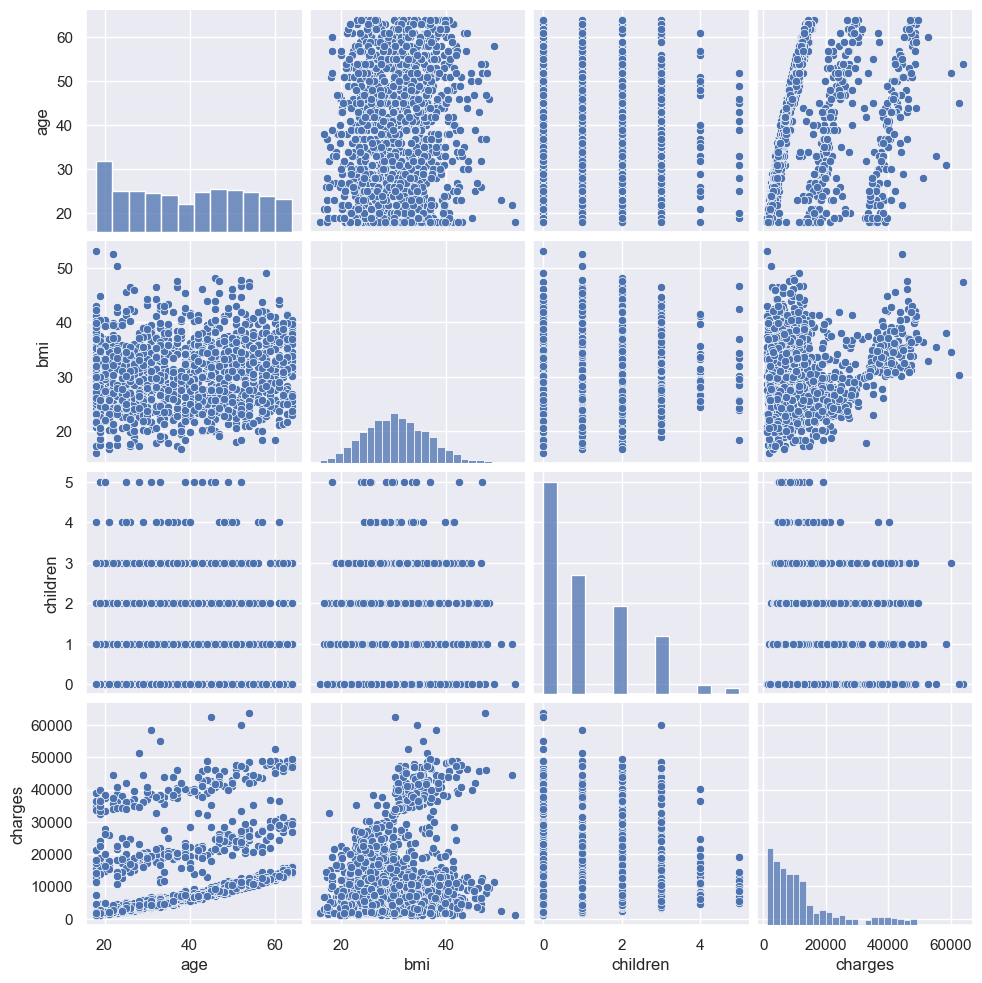

<IPython.core.display.Javascript object>

In [12]:
sns.pairplot(df)